In [1227]:
import matplotlib.pyplot as plt
import numpy as np
import analyzer
import Compare
import Read
import Maxima
import re
import os
import sys
import pickle
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import importlib
import timeit
import struct
import Plot_generator
from timeit import default_timer as timer
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Maxima)
importlib.reload(Plot_generator)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"text.usetex": True, "font.size": 16})


### Minimum main

[0.99477457 0.98654417 0.95127668 0.90375596 0.85876687 0.78115536
 0.71066391 0.64358798 0.38267235]
[0.99477457 0.98654417 0.95127668 0.90375596 0.85876687 0.78115536
 0.71066391 0.64358798 0.38267235]


()

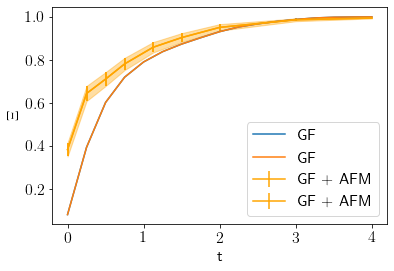

In [ ]:
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Plot_generator)

folder_in="../4x4x4x32/b2p44_new/gf_afm_4p0t/"
tao_compare=4

sizes=[4,4,4,32]
max_modes=8
colors=3
spin_length=4

lambda_min=0.01
lambda_max=0.15
steps=30
lambdas=np.linspace(lambda_min,lambda_max,num=steps)
RPO_threshold=0.15

conf_start=10
conf_end=1000
conf_step=10
conf=np.arange(conf_start,conf_end,conf_step)
folder_gf="../4x4x4x32/b2p44_new/gf/"

top_gauge,conf_read=analyzer.Count_index_gf(folder_gf,configurations)

#Compare.Index_dic(folder_in,lambdas, conf)
#Compare.GM_RPO_cut(folder_in,folder_out,sizes,max_modes,colors,spin_length,conf,lambdas,RPO_threshold,tao_compare,False)

tao_compare=4
folder_in="../4x4x4x32/b2p44_new/compare_"+str(tao_compare)+"p0t/"
folder_out=folder_in
measures=["gf_afm_4p0t/", "gf_afm_3p0t/", "gf_afm_2p0t/","gf_afm_1p5t/", 
          "gf_afm_1p125t/", "gf_afm_0p75t/", "gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"]
time_measures=[4,3,2,1.5,1.125,0.75,0.5,0.25,0]
obersvable="GM"
#Plot_generator.susy_plot("../4x4x4x32/b2p44_new/"+measures[2],folder_out+measures[2],sizes,colors,spin_length,max_modes,lambda_opt,configurations)
#Plot_generator.MC_history(folder_in,folder_out,measures,lambdas,observable)
#Plot_generator.Cut_dependence(folder_in,folder_out,measures,observable)
folder_gf="../4x4x4x32/b2p44_new/gf/"
Plot_generator.GF_vs_AFM(folder_in, folder_gf, folder_out, conf_read, t_start, t_end, t_step,
                         RPO_trehsold,tau_compare,measures,time_measures,observable)


### GF

In [159]:
configurations=np.arange(10,1000,10)
folder="../4x4x4x32/b2p44_new/gf/"
count_top, conf_read=analyzer.Count_index_gf(folder,configurations)

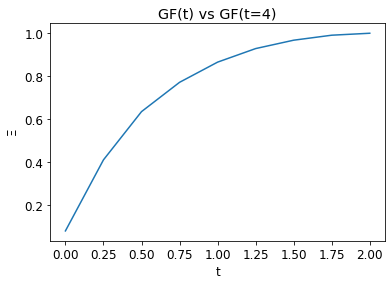

In [160]:
folder="../4x4x4x32/b2p44_new/"
measure="gf/"
observable="GM"
data=np.loadtxt(folder+measure+observable+".txt")
#ov_max, susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
plt.xlabel("t")
plt.ylabel(r'$\Xi$')
plt.rcParams.update({'font.size': 12})
plt.title('GF(t) vs GF(t=4)')
plt.plot(data[1],data[0], label="$t=4.0$")
plt.savefig(folder+"./GF.pdf")


### MC history and error bars

0.994774572320626


KeyboardInterrupt: 

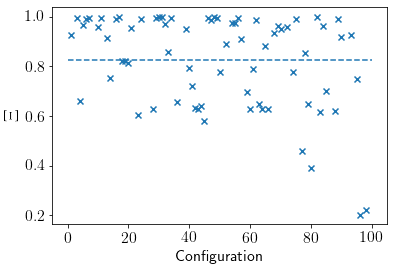

In [1185]:
plt.rcParams.update({"text.usetex": True, "font.size": 16})
# Read dictionary pkl file
folder_out="../4x4x4x32/b2p44_new/compare_4p0t/"
for measure in ("gf_afm_4p0t/", "gf_afm_3p0t/", "gf_afm_2p0t/","gf_afm_1p5t/", "gf_afm_1p125t/", "gf_afm_1p0t/","gf_afm_0p75t/", "gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"):
    for t in range(0,20):
        with open(folder_out+measure+"./GM_hist_"+str(t)+".txt", 'rb') as f:
            #print(folder_out+measure+"./GM_hist_"+str(t)+".txt")
            GM = pickle.load(f)
        x=[]
        GM_mc=[]
        GM_mean=0
        variance=0
        for key in GM:
            GM_mean+=float(GM[key])
            x.append(int(key)/10)
        GM_mean/=len(GM)
        for key in GM:
            GM_mc.append(GM[key])
            variance+=(GM[key]-GM_mean)**2
        error=np.sqrt(variance)/len(GM)
        with open(folder_out+measure+"./GM_error_opt_"+str(t)+".txt", 'w') as f:
            #print(folder_out+measure+"./GM_error_opt.txt")
            f.write(str(error))
        plt.scatter(x,GM_mc, marker="x")
        plt.hlines(GM_mean, xmin=0, xmax=100, linestyle="--")
        plt.xlabel(r'Configuration')
        plt.ylabel(r'$$ \mbox{\huge $ \Xi$}$$')
        plt.xticks(np.arange(0, 120,  step=20))
        plt.savefig(folder_out+measure+"GM_history_"+str(t)+".pdf",dpi=150, bbox_inches='tight')
        f=open(folder+measure+"lambda_opt.txt",'r')
        lamba_string=f.read().split('\n')
        lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
        f.close()
        if index_opt==t:
            plt.savefig(folder_out+measure+"GM_history_opt.pdf",dpi=150, bbox_inches='tight')
            print(GM_mean)
        plt.close()

### Merging plots

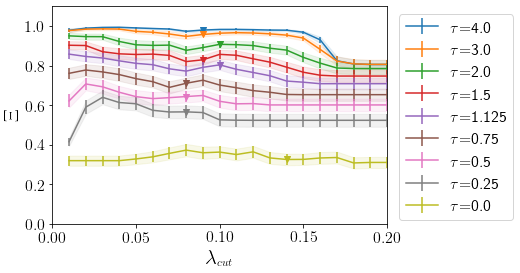

In [881]:
observable="GM"
folder="../4x4x4x32/b2p44_new/compare_4p0t/"
plt.rcParams.update({'font.size': 16})
ax = plt.gca()
for measure in ("gf_afm_4p0t/", "gf_afm_3p0t/", "gf_afm_2p0t/", "gf_afm_1p5t/", 
                "gf_afm_1p125t/", "gf_afm_0p75t/", "gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"):
    
    time=re.sub("gf_afm", "", measure)
    time=re.sub("t","", time)
    time=re.sub("p",".", time)
    time=re.sub("/","", time)
    time=re.sub("_","", time)
    data=np.loadtxt(folder+measure+observable+".txt")
    susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
    
    error=[]
    for t in range(0,len(data[0])):
        with open(folder_out+measure+"./GM_error_opt_"+str(t)+".txt", 'r') as f:
            error.append(float(f.readline()))
        f.close()
        
    color = next(ax._get_lines.prop_cycler)['color']
    plt.errorbar(data[1],data[0], yerr=error, label=r'$\tau$'+"="+time, color=color)
    plt.fill_between(data[1], data[0]-error, data[0]+error, alpha=0.1, color=color)
    plt.scatter(susy_max[0],data[0,int(susy_max[1])], marker="v", color=color)

plt.xlabel(r'$$ \mbox{\huge $\lambda$}_{cut} $$')
plt.ylabel(r'$$ \mbox{\huge $ \Xi$}$$')
#plt.legend(loc="upper right", ncol=1)
plt.ylim([0,1.1])
plt.xlim([0.0,0.20])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])

# Put a legend to the right of the current axis
ax.legend(loc="upper right", ncol=1, bbox_to_anchor=(1.40, 1))

plt.savefig(folder+observable+"_4t.pdf",dpi=150, bbox_inches='tight')


### Xi max and GF

In [1027]:
def Xi_max(data,susy_max):
    maximum=0
    for i in range(0,len(data[0])):
            if (data[0,i] > maximum) and (data[1,i]<susy_max[0]):
                maximum=data[0,i]
    return(maximum)

In [1028]:
def find_max(folder,measure,observable):
    data=np.loadtxt(folder+measure+observable+".txt")
    if measure=="gf_afm_0p0t/":
        susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
    else:
        susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
    maximum=Xi_max(data,susy_max)
    return(maximum)

In [1026]:
importlib.reload(Compare)
importlib.reload(analyzer)
folder_in="../4x4x4x32/b2p44_new/gf/"
folder_out="../4x4x4x32/b2p44_new/compare_4p0t/"
#folder="../4x4x4x32/b2p44_new/gf/"
conf_start=10
conf_end=1000
conf_step=10
configurations=np.arange(conf_start,conf_end,conf_step)
t_start=0
t_end=4
t_step=0.25
RPO_trehsold=0.175
tau_compare=4

GM_GF=Compare.GF_vs_GF(folder_in, folder_out, configurations, t_start, t_end, t_step,RPO_trehsold,tau_compare)

In [1214]:
print(measure)

gf_afm_0p0t/


[0.99477457 0.98654417 0.         0.90375596 0.85876687 0.7785188
 0.70801853 0.64034103 0.37320505]
../4x4x4x32/b2p44_new/compare_4p0t/
GM


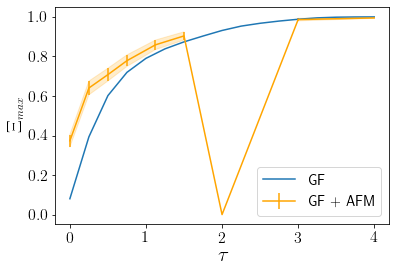

In [1226]:
plt.rcParams.update({'font.size': 16})
ax = plt.gca()
observable="GM"
folder="../4x4x4x32/b2p44_new/compare_4p0t/"
maximum=np.zeros((9))
error=np.zeros((9))
t=0
for measure in ("gf_afm_4p0t/", "gf_afm_3p0t/", "gf_afm_2p0t/", "gf_afm_1p5t/", "gf_afm_1p125t/", "gf_afm_0p75t/","gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"):
    data=np.loadtxt(folder+measure+observable+".txt")
    
    f=open(folder+measure+"lambda_opt.txt",'r')
    lamba_string=f.read().split('\n')
    lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
    f.close()
    f=open(folder+measure+"GM_error_opt_"+str(index_opt)+".txt",'r')
    error[t]=float(f.read())
    f.close()
    
    maximum[t]=find_max(folder,measure,observable)
    t+=1
print(maximum)
t=[4,3,2,1.5,1.125,0.75,0.5,0.25,0]

observable="GM"
data=np.loadtxt(folder+observable+".txt")
print(folder)
print(observable)
plt.xlabel(r'$$ \mbox{\huge $\tau$} $$')
plt.ylabel(r'$$ \mbox{\huge $ \Xi$}_{max}$$')

plt.rcParams.update({'font.size': 16})
#plt.title('(GF + AFM) vs GF')
plt.plot(data[1],data[0], label=r'{\Large GF}')
plt.errorbar(t,maximum, yerr=error, color="orange", label=r'{\Large GF + AFM}')
plt.fill_between(t, maximum-error, maximum+error,color="orange",alpha=0.2)
plt.legend(loc="lower right")
plt.savefig(folder+"./GF_AFM_4p0t.pdf",dpi=150, bbox_inches='tight')

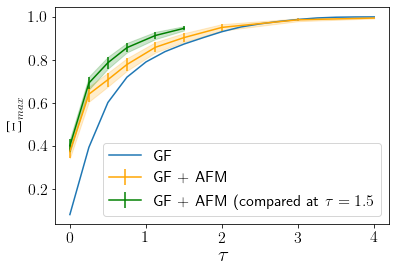

In [1048]:
observable="GM"
folder="../4x4x4x32/b2p44_new/compare_4p0t/"
maximum=np.zeros((9))
error=np.zeros((9))
t=0
for measure in ("gf_afm_4p0t/", "gf_afm_3p0t/", "gf_afm_2p0t/", "gf_afm_1p5t/", "gf_afm_1p125t/", "gf_afm_0p75t/","gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"):
    data=np.loadtxt(folder+measure+observable+".txt")
    
    f=open(folder+measure+"lambda_opt.txt",'r')
    lamba_string=f.read().split('\n')
    lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
    f.close()
    f=open(folder+measure+"GM_error_opt_"+str(index_opt)+".txt",'r')
    error[t]=float(f.read())
    f.close()
    
    maximum[t]=find_max(folder,measure,observable)
    t+=1
t=[4,3,2,1.5,1.125,0.75,0.5,0.25,0]

observable="GM"
data=np.loadtxt(folder+observable+".txt")
plt.xlabel("t")
plt.ylabel(r'$\Xi$')
plt.rcParams.update({'font.size': 12})
#plt.title('(GF + AFM) vs GF')
plt.plot(data[1],data[0], label="GF")
plt.errorbar(t,maximum, yerr=error, color="orange", label="GF + AFM")
plt.fill_between(t, maximum-error, maximum+error,color="orange",alpha=0.2)
plt.legend(loc="lower right")

observable="GM"
folder="../4x4x4x32/b2p44_new/compare_1p5t/"
maximum=np.zeros((6))
error=np.zeros((6))
t=0
for measure in ("gf_afm_1p5t/", "gf_afm_1p125t/", "gf_afm_0p75t/","gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"):
    data=np.loadtxt(folder+measure+observable+".txt")
    
    f=open(folder+measure+"lambda_opt.txt",'r')
    lamba_string=f.read().split('\n')
    lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
    f.close()
    f=open(folder+measure+"GM_error_opt_"+str(index_opt)+".txt",'r')
    error[t]=float(f.read())
    f.close()
    
    maximum[t]=find_max(folder,measure,observable)
    t+=1
t=[1.5,1.125,0.75,0.5,0.25,0]

observable="GM"
#data=np.loadtxt(folder+observable+".txt")

plt.xlabel(r'$$ \mbox{\huge $\tau$} $$')
plt.ylabel(r'$$ \mbox{\huge $ \Xi$}_{max}$$')

plt.rcParams.update({'font.size': 16})
#plt.title('(GF + AFM) vs GF')
#plt.plot(data[1],data[0], label="GF")
plt.errorbar(t,maximum, yerr=error, color="green", label=r'GF + AFM (compared at $\tau=1.5$')
plt.fill_between(t, maximum-error, maximum+error,color="green",alpha=0.2)
plt.legend(loc="lower right")
plt.savefig(folder+"./GF_AFM_1p5t.pdf",dpi=150, bbox_inches='tight')

### Example Configurations

In [1124]:
measure="gf_afm_0p5t/"
f=open(folder_out+measure+"lambda_opt.txt",'r')
lamba_string=f.read().split('\n')
lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
f.close()
with open(folder_out+measure+"./GM_hist_"+str(index_opt)+".txt", 'rb') as f:
    GM = pickle.load(f)
for element in GM:
    if GM[element]>0.95:
        print(element, GM[element])


10 0.9906790252615755
50 0.9948053625222998
100 0.9526472764000969
140 0.9653073896839873
200 0.9931610654497229
210 0.9803987746521702
240 0.9903597529737
290 0.9960342735779667
310 0.9911094756527387
340 0.9900853788468302
410 0.9859581790006997
430 0.9808600014244803
440 0.9816519024809512
480 0.991764098503477
490 0.9872383654969652
560 0.9850100382978363
570 0.9894503724762084
590 0.9917288471529426
610 0.9831433934152761
630 0.98972667616991
640 0.9956544307021201
680 0.9872427325453612
700 0.9916535136256622
790 0.9821893681279249
850 0.9870321829051937
880 0.9914507542563169
900 0.9887116378443418


0.8431217282800757


FileNotFoundError: ../4x4x4x32/b2p44_new/compare_4p0t/gf_afm_0p5t/susy_mode_40c.txt not found.

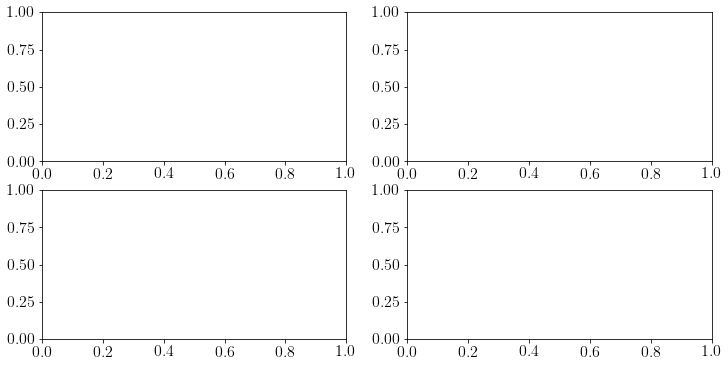

In [1138]:
folder_out='../4x4x4x32/b2p44_new/compare_4p0t/'
folder="../4x4x4x32/b2p44_new/compare_4p0t/"
measure="gf_afm_0p5t/"
configurations=np.arange(10,1000,10)
top_gauge,conf_read=analyzer.Count_index_gf(folder,configurations)
conf_read=[40,160,470,540]
#ax = plt.gca()
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,6))
index=0

f=open(folder_out+measure+"lambda_opt.txt",'r')
lamba_string=f.read().split('\n')
lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
f.close()

with open(folder_out+measure+"./GM_hist_"+str(index_opt)+".txt", 'rb') as f:
    GM = pickle.load(f)
for conf in conf_read:
    print(GM[str(conf)])
    #Read GF
    Topology_1=folder+"../gf/profile4dt0.5c"+str(conf)+"to.dat"
    Topology_2=folder+"../gf/profile4dt2c"+str(conf)+"to.dat"
    Topology_3=folder+"../gf/profile4dt4c"+str(conf)+"to.dat"
    density_top_1,sizes=Read.topology_1d(Topology_1)
    density_top_2,sizes=Read.topology_1d(Topology_2)
    density_top_3,sizes=Read.topology_1d(Topology_3)
    
    normalization=np.sum(np.abs(density_top_3))

    #Construct susy mode
    density_susy=np.loadtxt(folder+measure+"susy_mode_"+str(conf)+"c.txt")
    density_susy=density_susy*(normalization/np.sum(np.abs(density_susy)))

    i=index%2
    j=int(index/2)%2
    #Plot the three densities
    axes[i,j].plot(density_top_1,label=r'Top. density $\tau=0.5$')
    axes[i,j].plot(density_top_2, label=r'Top. density $\tau=2$')
    axes[i,j].plot(density_top_3, label=r'Top. density $\tau=4$')
    axes[i,j].plot(density_susy, label=r'SZM density $\tau=0.5$')
    
    axes[i,j].set_ylabel(r'q(t)')
    axes[i,j].set_xlabel(r't')
    
    index+=1
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])

# Put a legend to the right of the current axis
axes[0,0].legend(loc="center", ncol=2, bbox_to_anchor=(1.10, 1.25))

fig.savefig(folder_out+"MC_densities.pdf",dpi=150, bbox_inches='tight')

plt.close()


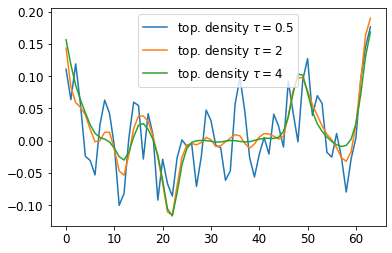

In [41]:
folder="../8x8x8x64_su2/b2p60/"
#measure="gf/"
conf=2300
#Read GF
Topology_1=folder+"./gf/profile4dt0.5c"+str(conf)+"to.dat"
Topology_2=folder+"./gf/profile4dt2c"+str(conf)+"to.dat"
Topology_3=folder+"./gf/profile4dt4c"+str(conf)+"to.dat"
density_top_1,sizes=Read.topology_1d(Topology_1)
density_top_2,sizes=Read.topology_1d(Topology_2)
density_top_3,sizes=Read.topology_1d(Topology_3)

normalization=np.sum(np.abs(density_top_3))

#Construct susy mode
#density_susy=np.loadtxt(folder+measure+"susy_mode_"+str(conf)+"c.txt")
#density_susy=density_susy*(normalization/np.sum(np.abs(density_susy)))
#Plot the three densities
plt.plot(density_top_1, label=r'top. density $\tau=0.5$')
plt.plot(density_top_2, label=r'top. density $\tau=2$')
plt.plot(density_top_3, label=r'top. density $\tau=4$')
#plt.plot(density_susy, label=r'AFM at $\tau=0.5$')
plt.legend(loc="upper center", ncol=1)
plt.savefig(folder+"gf/gf_"+str(conf)+"c.png",dpi=150, bbox_inches='tight')
#plt.close()